<a href="https://colab.research.google.com/github/walkerjian/DailyCode/blob/main/Code_Craft_find_depth.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
def find_depth(tree_string):
    stack = []
    max_depth = 0

    for char in tree_string:
        if char == '(':
            stack.append(char)
        elif char == ')':
            if stack:
                stack.pop()
        max_depth = max(max_depth, len(stack))

    return max_depth


# Example usage:
tree_strings = [
    "(00)",                # A root node with no children: Depth 1
    "((00)(00))",          # A root node with two children: Depth 2
    "((((00)0)0)0)",       # An unbalanced tree with three consecutive left children: Depth 4
    # Add more test cases if necessary
]

for tree in tree_strings:
    print(f"The depth of the tree {tree} is {find_depth(tree)}")


The depth of the tree (00) is 1
The depth of the tree ((00)(00)) is 2
The depth of the tree ((((00)0)0)0) is 4


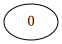

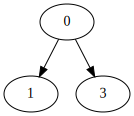

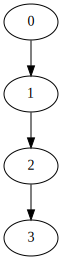

In [16]:
from graphviz import Digraph

class TreeNode:
    def __init__(self, left=None, right=None):
        self.left = left
        self.right = right

def build_tree(tree_str, index=0):
    if index >= len(tree_str) or tree_str[index] == '0':
        return None, index
    index += 1  # Skipping '('
    left_subtree, index = build_tree(tree_str, index)
    index += 1  # Skipping separator
    right_subtree, index = build_tree(tree_str, index)
    index += 1  # Skipping ')'
    return TreeNode(left_subtree, right_subtree), index

def add_nodes_edges(graph, node, node_id=0):
    if node is None:
        return None
    left_id = node_id + 1
    right_id = left_id + 1
    graph.node(str(node_id))
    if node.left is not None:
        graph.node(str(left_id))
        graph.edge(str(node_id), str(left_id))
        right_id = add_nodes_edges(graph, node.left, left_id)
    if node.right is not None:
        if right_id is None:
            right_id = left_id + 1
        graph.node(str(right_id))
        graph.edge(str(node_id), str(right_id))
        right_id = add_nodes_edges(graph, node.right, right_id)
    return right_id

def visualize_tree(tree_str):
    tree, _ = build_tree(tree_str)
    graph = Digraph()
    add_nodes_edges(graph, tree)
    return graph  # Returning the graph object for Colab to render

# Test trees
test_trees = [
    "(00)",
    "((00)(00))",
    "((((00)0)0)0)"
]

# Visualize the trees in Colab
for tree in test_trees:
    graph = visualize_tree(tree)
    display(graph)  # Display the graph inline in Colab
